# Análisis Exploratorio de Datos (EDA) - TFM
# Análisis exploratorio del dataset de Idealista
Este análisis forma parte del Trabajo Fin de Máster (TFM) y tiene como objetivo explorar, limpiar y preparar los datos obtenidos de Idealista. Se busca detectar valores nulos, outliers y patrones relevantes que ayuden a construir un modelo predictivo para el precio de alquiler de viviendas.


In [3]:
## 1. Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set(style='whitegrid')

In [5]:
## 2. Carga de datos

# Cargar datos
dataframe = pd.read_csv("data/Datos.csv")
dataframe.head()


,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,madrid,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,0,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,madrid,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,159000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,madrid,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,0,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,madrid,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,0,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,madrid,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,750000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


In [7]:
# Información general del dataframe
print("INFO DATAFRAME")
dataframe.info()

INFO DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11826 entries, 0 to 11825
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   provincia       11826 non-null  object 
 1   zona            11826 non-null  object 
 2   titulo          11826 non-null  object 
 3   PrecioActual    11826 non-null  int64  
 4   PrecioAnterior  11826 non-null  int64  
 5   metros          11826 non-null  int64  
 6   habitaciones    11460 non-null  float64
 7   ascensor        11033 non-null  object 
 8   localizacion    10730 non-null  object 
 9   planta          10601 non-null  object 
 10  baños           11826 non-null  int64  
 11  tags            11664 non-null  object 
 12  descripcion     11761 non-null  object 
 13  Enlace          11826 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.3+ MB


In [9]:
# Estadísticas descriptivas
print("Description DATAFRAME")
dataframe.describe()

Description DATAFRAME


,PrecioActual,PrecioAnterior,metros,habitaciones,baños
count,1.182600e+04,1.182600e+04,11826.000000,11460.000000,11826.000000
mean,1.030501e+06,7.359704e+04,153.790039,2.847731,0.394047
std,1.237718e+06,3.639753e+05,766.217750,1.432402,0.882134
min,1.200000e+04,0.000000e+00,11.000000,1.000000,0.000000
25%,2.890000e+05,0.000000e+00,68.000000,2.000000,0.000000
50%,6.200000e+05,0.000000e+00,103.000000,3.000000,0.000000
75%,1.329000e+06,0.000000e+00,160.000000,3.000000,0.000000
max,2.300000e+07,8.450000e+06,75000.000000,20.000000,7.000000


In [11]:
# Comprobación de valores nulos
print("NULL VALUES DATAFRAME")
dataframe.isnull().sum()

NULL VALUES DATAFRAME


provincia            0
zona                 0
titulo               0
PrecioActual         0
PrecioAnterior       0
metros               0
habitaciones       366
ascensor           793
localizacion      1096
planta            1225
baños                0
tags               162
descripcion         65
Enlace               0
dtype: int64

In [13]:
# Rellenar valores nulos en columnas específicas
dataframe['habitaciones'] = dataframe['habitaciones'].fillna(-1)
dataframe['ascensor'] = dataframe['ascensor'].fillna('No informado')
dataframe['localizacion'] = dataframe['localizacion'].fillna('No informado')
dataframe['planta'] = dataframe['planta'].fillna('Desconocido')
dataframe['tags'] = dataframe['tags'].fillna('No etiquetas')
dataframe['descripcion'] = dataframe['descripcion'].fillna('Sin descripción')

In [15]:
# Verificación tras imputación
dataframe.isnull().sum()

provincia         0
zona              0
titulo            0
PrecioActual      0
PrecioAnterior    0
metros            0
habitaciones      0
ascensor          0
localizacion      0
planta            0
baños             0
tags              0
descripcion       0
Enlace            0
dtype: int64

In [17]:
# Detección de outliers por metros y precio
outlier_metros = dataframe['metros'] > 1000
outlier_precio = dataframe['PrecioActual'] > 5000000

dataframe['outlier'] = np.where(outlier_metros | outlier_precio, True, False)

print(f"Número de outliers detectados: {dataframe['outlier'].sum()}")
dataframe[dataframe['outlier'] == True].head()

Número de outliers detectados: 213


,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace,outlier
38,madrid,barrio-de-salamanca,"Piso en calle de Hermosilla, Recoletos, Madrid",6000000,0,380,5.0,S,EXTERIOR,4ª,0,"VIVIENDA,EXCLUSIVA,LUJO,INMOBILIARIA,METRO","Álvora Capital Properties, consultora inmobili...",https://www.idealista.com/inmueble/107172923/,True
47,madrid,hortaleza,Casa o chalet independiente en calle Castillo ...,5500000,0,1150,9.0,No informado,No informado,Desconocido,0,"TERRAZA,VISTAS,CHALET,PARQUE,IMPRESIONANTE,PAR...",Impresionante chalet independiente de 1.150 m2...,https://www.idealista.com/inmueble/35671060/,True
56,madrid,barrio-de-salamanca,"Piso en Recoletos, Madrid",9250000,0,550,4.0,S,EXTERIOR,5ª,0,"PISO,ESPECTACULAR,EXCLUSIVO,METRO",Olisson Club pone a su disposición este espect...,https://www.idealista.com/inmueble/107086729/,True
69,madrid,moncloa,"Casa o chalet independiente en calle Lamiaco, ...",4000000,0,1100,6.0,No informado,No informado,Desconocido,0,"LUJO,CHALET,PARCELA",Sumérgete en el lujo y la elegancia de este ex...,https://www.idealista.com/inmueble/100904335/,True
122,madrid,moncloa,Casa o chalet independiente en avenida Osa May...,2750000,0,1240,16.0,No informado,No informado,Desconocido,0,"VISTAS,ESTRENAR,PISCINA,GARAJE,NUEVO","Fantástico unifamiliar, con excelentes vistas ...",https://www.idealista.com/inmueble/106030032/,True


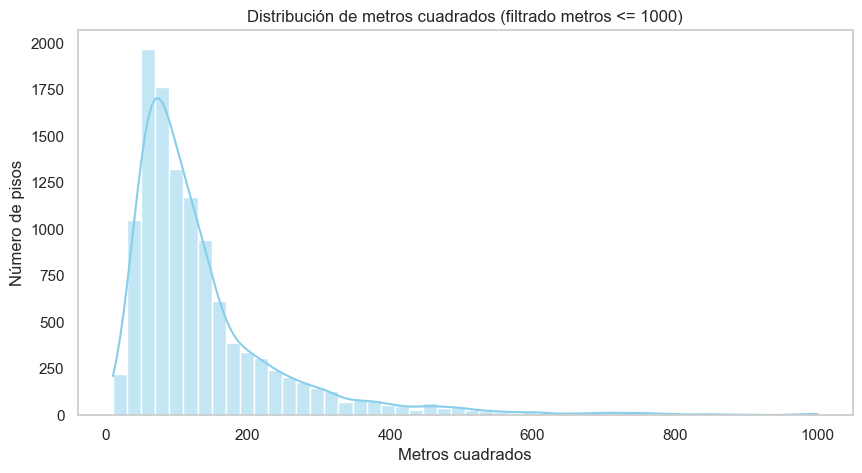

In [19]:
# Visualización de la distribución de metros cuadrados
plt.figure(figsize=(10, 5))
sns.histplot(dataframe.loc[dataframe['metros'] <= 1000, 'metros'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de metros cuadrados (filtrado metros <= 1000)')
plt.xlabel('Metros cuadrados')
plt.ylabel('Número de pisos')
plt.grid()
plt.show()


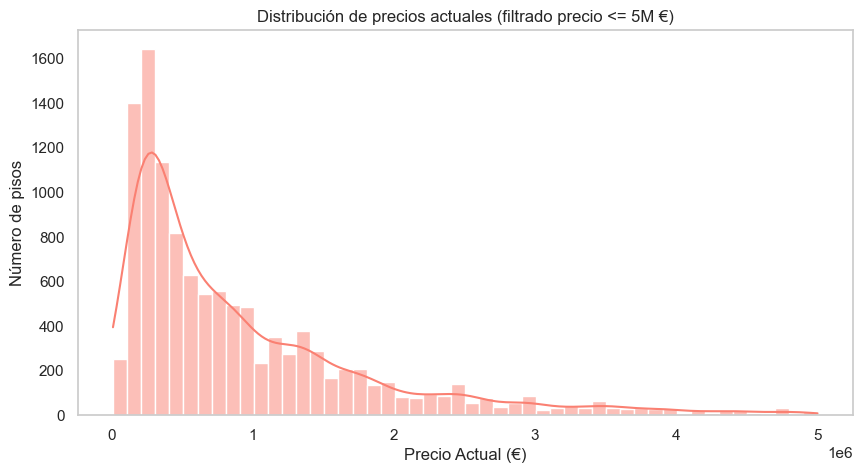

In [21]:

# Visualización de la distribución de precios actuales
plt.figure(figsize=(10, 5))
sns.histplot(dataframe.loc[dataframe['PrecioActual'] <= 5000000, 'PrecioActual'], bins=50, kde=True, color='salmon')
plt.title('Distribución de precios actuales (filtrado precio <= 5M €)')
plt.xlabel('Precio Actual (€)')
plt.ylabel('Número de pisos')
plt.grid()
plt.show()

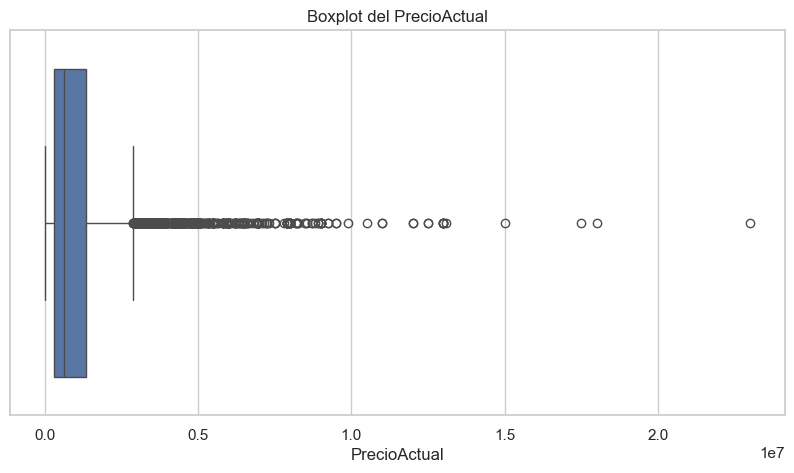

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataframe['PrecioActual'])
plt.title('Boxplot del PrecioActual')
plt.show()


In [25]:
# Crear un dataframe limpio sin outliers
dataframe_limpio = dataframe[(dataframe['outlier'] == False)].copy()

print(f"Dataframe limpio final: {dataframe_limpio.shape[0]} filas")
dataframe_limpio.head()

Dataframe limpio final: 11613 filas


,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace,outlier
0,madrid,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,0,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/,False
1,madrid,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,159000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/,False
2,madrid,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,0,36,1.0,S,No informado,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/,False
3,madrid,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,0,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/,False
4,madrid,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,750000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/,False
